In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df= pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
x = df.drop(columns = ["Exited"])
y = df["Exited"].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train_trf = scalar.fit_transform(x_train)
x_test_trf = scalar.fit(x_test)

In [22]:
pip install tensorflow

  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=3f66079a0113642ac73d49ff7746e7bbc6195f0cac793403262a3d74738fb660
  Stored in directory: c:\users\patel\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="Adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [29]:
history = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7958 - val_loss: 0.4989 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 935us/step - loss: 0.5019 - accuracy: 0.7958 - val_loss: 0.4970 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 914us/step - loss: 0.5006 - accuracy: 0.7958 - val_loss: 0.4962 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 918us/step - loss: 0.5001 - accuracy: 0.7958 - val_loss: 0.4953 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 937us/step - loss: 0.4998 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 871us/step - loss: 0.4996 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 894us/step - loss: 0.4995 - accuracy: 0.7958 - val_loss: 0.4947 - val_accu

128/128 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4944 - val_accuracy: 0.7969
Epoch 58/100
128/128 [==============================] - 0s 895us/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 878us/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 883us/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969

In [30]:
y_pred =model.predict(x_test)

63/63 [==============================] - 0s 641us/step


In [33]:
y_pred


array([[0.25238577],
       [0.24006118],
       [0.24006118],
       ...,
       [0.24006118],
       [0.2553394 ],
       [0.25238577]], dtype=float32)

In [34]:
y_pred = y_pred.argmax(axis=-1)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

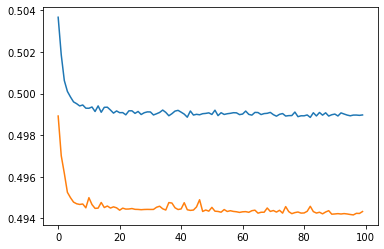

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

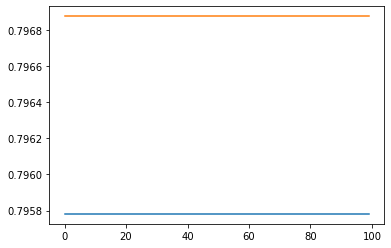

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])